In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
datos1 = pd.read_csv('ejercicio_1.csv', sep=',')
datos2 = pd.read_csv('ejercicio_2.csv', sep=',')
datos3 = pd.read_csv('ejercicio_3.csv', sep=',')
datos4 = pd.read_csv('ejercicio_4.csv', sep=',')

In [39]:
datos1

,X,Y
0,-4.406280,-1.383344
1,-2.722675,3.918974
2,4.610505,3.513816
3,3.510524,1.139324
4,8.767744,4.575692
...,...,...
95,-3.938697,-3.316558
96,18.097452,14.914027
97,7.836851,6.051094
98,-7.145026,-7.592345


In [53]:
def graficar(df, colA, colB, ejercicio):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row[colA])
        eje_y.append(row[colB])

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)
    plt.title('Scatter Plot ' + ejercicio)
    plt.xlabel('X')
    plt.ylabel('Y')

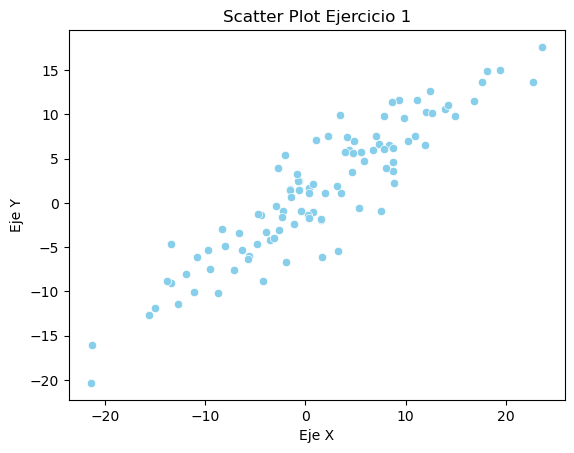

In [41]:
graficar(datos1, 'X', 'Y', 'Ejercicio 1')

Hallamos la recta que mejor aproxima los datos

In [54]:
def graficar_recta(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s para incluir el intercepto (beta_0)
    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x))

    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    intercepto = beta[0]
    pendiente = beta[1]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Recta ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals
    plt.plot(x_vals, y_vals, color='red', label='Recta ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión lineal ' + ejercicio)
    plt.legend()
    plt.show()

    

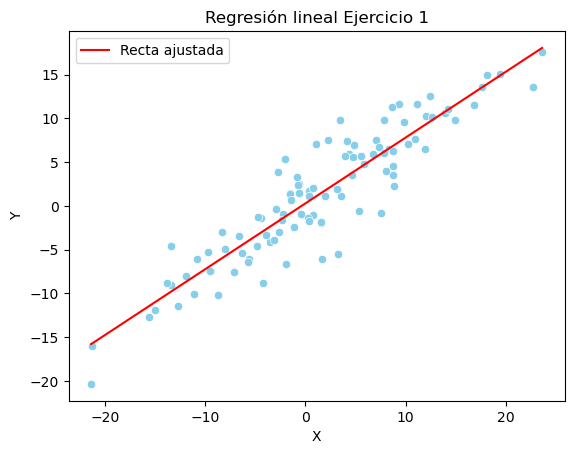

In [55]:
graficar_recta(datos1, 'X', 'Y', 'Ejercicio 1')

Repetimos los incisos (a) y (b), pero considerando los puntos {($x_i$, $y_i$ + 12) con i = 1...n}, donde ($x_i$, $y_i$) eran los puntos originales.


In [56]:
datos1c = datos1.copy()

for index, row in datos1c.iterrows():
    row['Y'] += 12

In [57]:
datos1c

,X,Y
0,-4.406280,10.616656
1,-2.722675,15.918974
2,4.610505,15.513816
3,3.510524,13.139324
4,8.767744,16.575692
...,...,...
95,-3.938697,8.683442
96,18.097452,26.914027
97,7.836851,18.051094
98,-7.145026,4.407655


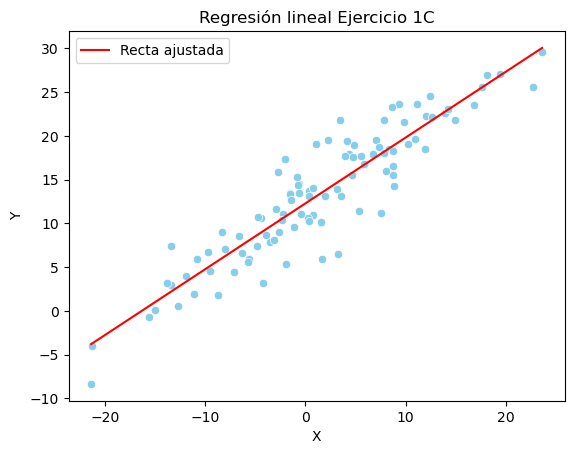

In [58]:
graficar_recta(datos1c, 'X', 'Y', 'Ejercicio 1C')

Extendemos el modelo para poder aproximar cualquier recta en el plano


...

### Ejercicio 2

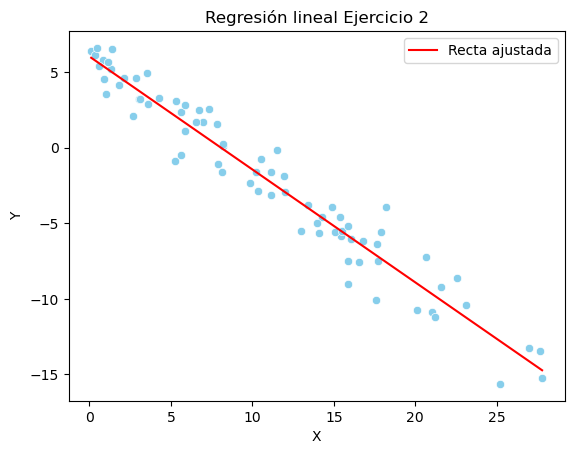

In [59]:
graficar_recta(datos2, 'X', 'Y',  'Ejercicio 2')

### Ejercicio 3

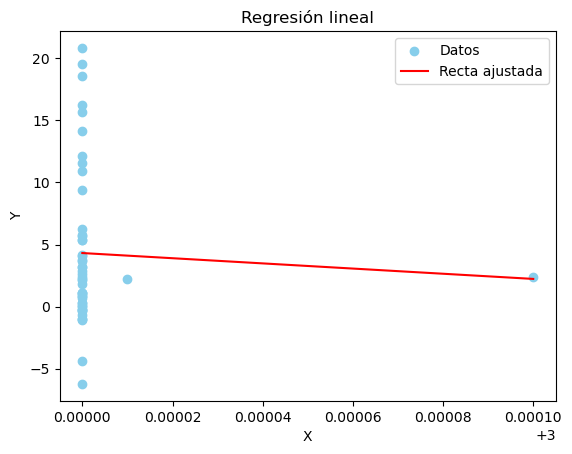

In [27]:
graficar_recta(datos3, 'X', 'Y', 'Ejercicio3')

In [64]:
datos3

,X,Y
0,3.00010,2.425000
1,3.00000,1.073500
2,3.00000,0.824700
3,3.00000,5.336756
4,3.00000,20.836000
5,3.00000,-0.236000
6,3.00000,16.233600
7,3.00000,0.335000
8,3.00000,11.573600
9,3.00001,2.213650


Explicar que vemos en el grafico

Calculamos el determinante de $X^T$ $X$

In [68]:
# Convertimos el dataframe a un array de numpy
# A = datos3[['X', 'Y']].to_numpy()  
A = datos3.to_numpy()

AtA = (A.T) @ A

det = round(np.linalg.det(AtA))

print(f"Determinante de (A^T)A: {det}")

Determinante de (A^T)A: 803617


### Ejercicio 4

In [29]:
datos4

,x_vector,y_error
0,0.261293,5.269016
1,0.282008,4.467631
2,0.624273,3.018444
3,0.727334,3.076645
4,0.899138,2.455100
5,1.110197,2.045111
6,1.140416,2.053735
7,1.277370,1.144468
8,1.550047,0.664446
9,1.567954,0.857060


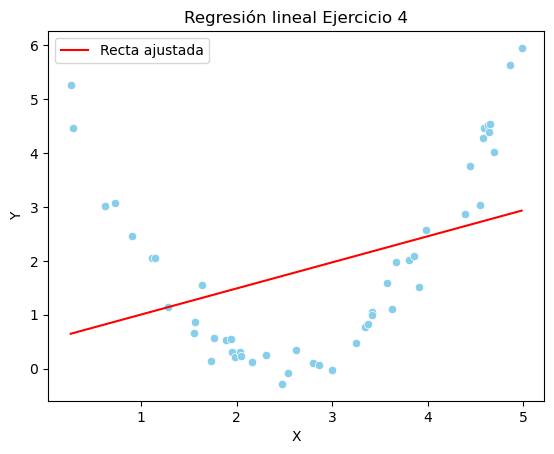

In [70]:
graficar_recta(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

En este caso, ya que no hay linealidad en los datos, utilizaremos una curva en vez de una recta. 

In [78]:
def graficar_curva(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s para incluir el intercepto (beta_0)
    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x, eje_x**2))

    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    intercepto = beta[0]
    pendiente = beta[1]
    coef_cuadratico = beta[2]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Recta ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals + coef_cuadratico * x_vals**2
    plt.plot(x_vals, y_vals, color='purple', label='Curva ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión cuadrática ' + ejercicio)
    plt.legend()
    plt.show()

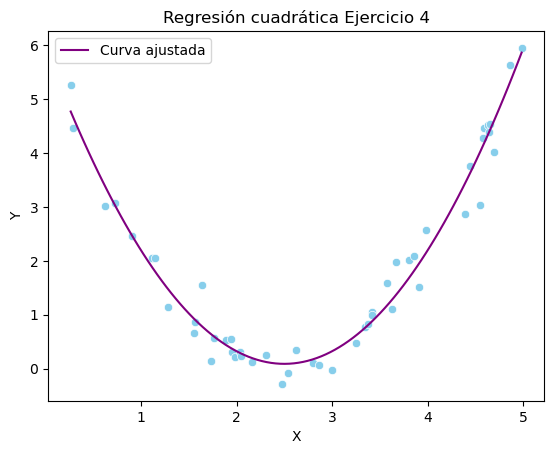

In [79]:
graficar_curva(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

In [85]:
def graficar_recta_polinomial(df, colA, colB, ejercicio, grado=10):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s y X^2, X^3, ..., X^grado
    X_matrix = np.column_stack([eje_x**i for i in range(grado+1)])

    # Cálculo de los coeficientes (beta_0, beta_1, ..., beta_grado)
    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    # Predicción de la curva ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    X_vals_matrix = np.column_stack([x_vals**i for i in range(grado+1)])
    y_vals = X_vals_matrix @ beta

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Graficar la curva ajustada
    plt.plot(x_vals, y_vals, color='red', label=f'Curva ajustada (Grado {grado})')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Regresión polinómica de grado {grado} - {ejercicio}')
    plt.legend()
    plt.show()


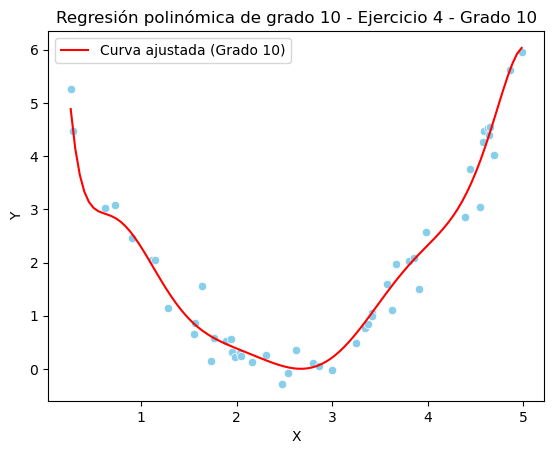

In [86]:
graficar_recta_polinomial(datos4, 'x_vector', 'y_error', 'Ejercicio 4 - Grado 10', grado=10)

Esto esta re overfitteado

# Tercera Parte

Separamos los datos en un training set y un test set

In [90]:
train = pd.read_csv('student_performance.csv', nrows=450)
test = pd.read_csv('student_performance.csv', skiprows=range(1,451))

In [92]:
train

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
445,3,56,0,7,6,36.0
446,9,98,0,6,7,96.0
447,1,82,1,9,4,62.0
448,1,47,0,9,2,22.0


In [ ]:
test

Usamos los datos de train para estimar los parámetros $\hat{\beta}$ que minimizan el error cuadrático medio para este problema.

In [98]:
# Separar variables independientes (X1,...,X5) y dependiente (Y)
X = train.drop(columns='Y Performance Index').to_numpy()  
y = train['Y Performance Index'].to_numpy().reshape(-1, 1) 

# Agregar columna de unos a X para el intercepto
X = np.column_stack((np.ones(X.shape[0]), X))

# Usamos la fórmula que obtuvimos en la parte 1
beta_estimados = np.linalg.inv(X.T @ X) @ X.T @ y

# Guardamos los coeficientes estimados en un diccionario para poder usarlos después
betas = dict()
for i in range(len(beta_estimados)):
    betas[f'Beta_{i}'] = beta_estimados[i][0]

betas

{'Beta_0': np.float64(-34.470322275015846),
 'Beta_1': np.float64(2.867108200658482),
 'Beta_2': np.float64(1.0235029752682696),
 'Beta_3': np.float64(0.5577888608665669),
 'Beta_4': np.float64(0.4623469612316101),
 'Beta_5': np.float64(0.20686477319049779)}

A partir de los valores estimados de los coeficientes, calculamos $\hat{y}$ como:
$$
\hat{y} = \beta_0 + \beta_1 X1_i + \beta_2 X2_i + \beta_3 X3_i + \beta_4 X4_i + \beta_5 X5_i
$$

En notación matricial
$$
\hat{y} = X \hat{\beta}
$$

In [100]:
y_estimada = X @ beta_estimados

In [101]:
y_estimada

array([[91.85200597],
       [63.18847189],
       [44.8731422 ],
       [36.37062666],
       [67.09525783],
       [59.36654569],
       [64.42586463],
       [38.17254256],
       [62.78745306],
       [69.93926317],
       [84.48902579],
       [72.51108969],
       [26.81049436],
       [33.10008416],
       [65.61330069],
       [47.42609051],
       [68.26628417],
       [71.89102101],
       [30.80201446],
       [59.8643706 ],
       [72.7513515 ],
       [85.14973521],
       [72.10827793],
       [58.94746227],
       [39.95935991],
       [53.67829628],
       [63.41540422],
       [81.88096072],
       [74.7064765 ],
       [75.00825753],
       [40.97949573],
       [35.55934233],
       [56.70408058],
       [49.01923557],
       [59.5136403 ],
       [76.09005333],
       [41.70415608],
       [69.13837099],
       [30.17059925],
       [63.86418297],
       [47.38629102],
       [39.0764522 ],
       [55.50804531],
       [37.87601851],
       [71.43560215],
       [54

Agregamos una columna para $\hat{y}$ 

In [102]:
train['Y Estimada'] = y_estimada.flatten()

In [103]:
train

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index,Y Estimada
0,7,99,1,9,1,91.0,91.852006
1,4,82,0,4,2,65.0,63.188472
2,8,51,1,7,2,45.0,44.873142
3,5,52,1,5,2,36.0,36.370627
4,7,75,0,8,5,66.0,67.095258
...,...,...,...,...,...,...,...
445,3,56,0,7,6,36.0,35.924786
446,9,98,0,6,7,96.0,95.859078
447,1,82,1,9,4,62.0,57.870401
448,1,47,0,9,2,22.0,21.076278


Definimos el error cuadrático medio (ECM) como el promedio de los errores (la diferencia entre la realidad y la predicción) al cuadrado:

$$
ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Calculamos ECM para los datos de train

In [ ]:
n = train.shape[0]
sumatoria = 0
for index, row in train.iterrows():
        sumatoria += (row['Y Performance Index'] - row['Y Estimada']) ** 2
ecm_train = sumatoria / n
ecm_train

np.float64(3.6009036870388864)